In [3]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
df = pandas.read_csv('API_NY.GDP.MKTP.CD_DS2_en_csv_v2_5728855/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_5728855.csv')
df.set_index(df['Country Name'], inplace=True)


In [4]:
import pycountry

# Generate a list of valid country names

countries = list(pycountry.countries)

country_codes = [country.alpha_3 for country in countries]

# Filter the DataFrame
df_countries_only = df[df['Country Code'].isin(country_codes)]

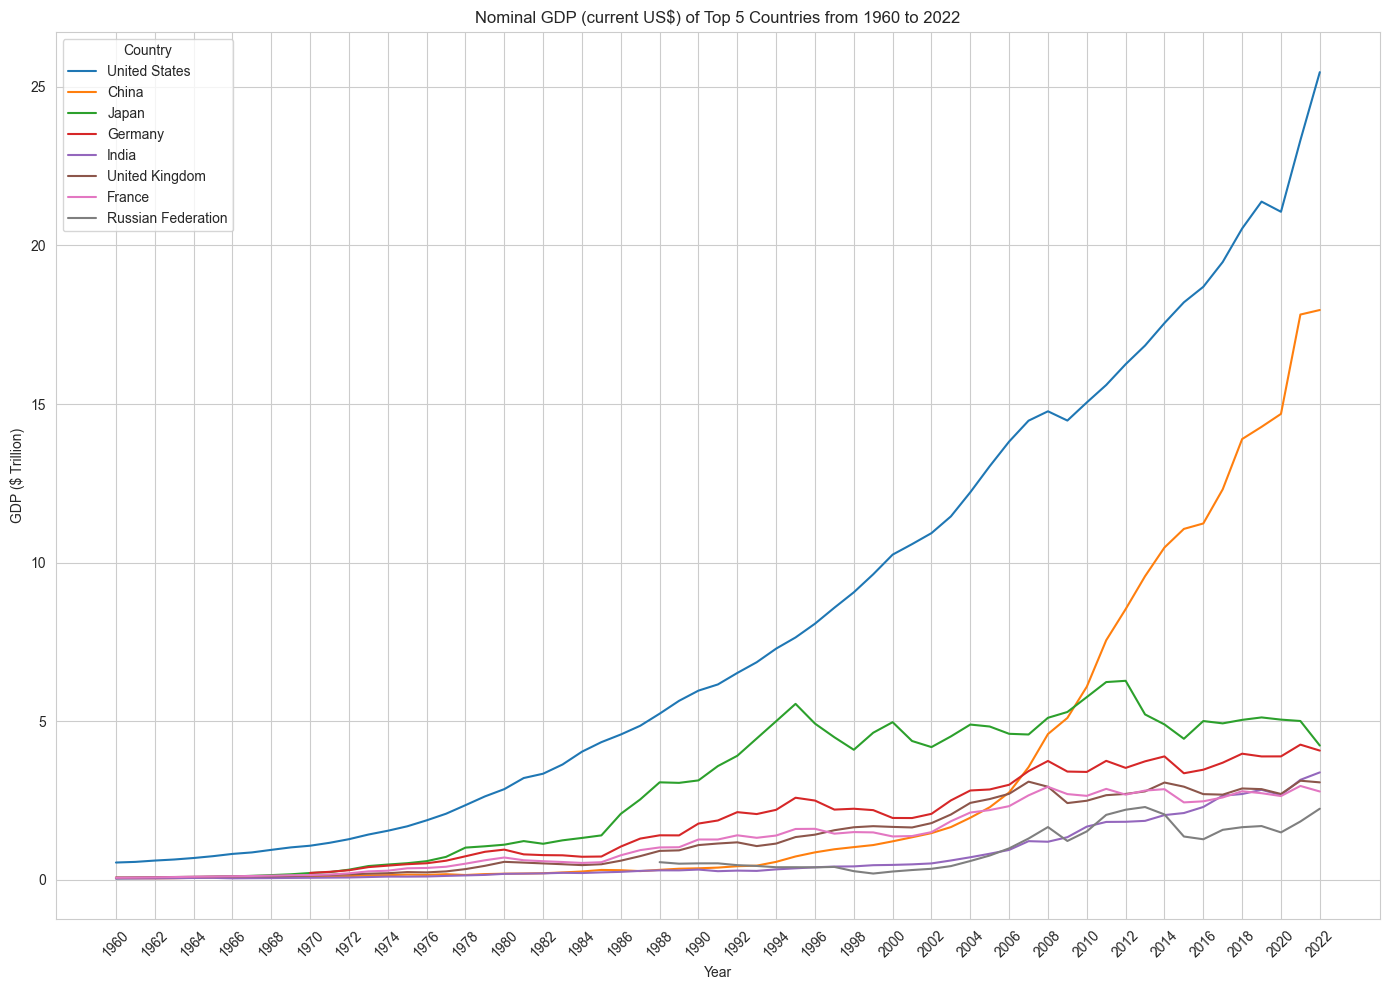

In [17]:
n=8
top_n_countries = df_countries_only.sort_values('2022', ascending=False).head(n)

# Set the 'Country Name' column as index
top_n_countries.set_index('Country Name', inplace=True)

# Transpose the dataframe for plotting
top_n_countries_transpose = top_n_countries.loc[:, '1960':'2022'].T

plt.figure(figsize=(14, 10))

# Use Seaborn style
sns.set_style("whitegrid")

# Plot data
sns.lineplot(data=top_n_countries_transpose/10**12, dashes=False)

# Set labels and title
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.xticks(ticks=[i for i in range(0, len(top_n_countries_transpose.index), 2)], 
           labels=[top_n_countries_transpose.index[i] for i in range(0, len(top_n_countries_transpose.index), 2)])
plt.ylabel('GDP ($ Trillion)')
plt.title('Nominal GDP (current US$) of Top 5 Countries from 1960 to 2022')

plt.legend(title='Country', loc='upper left')

plt.tight_layout()

plt.savefig('GDPtop5.jpg')
plt.show()


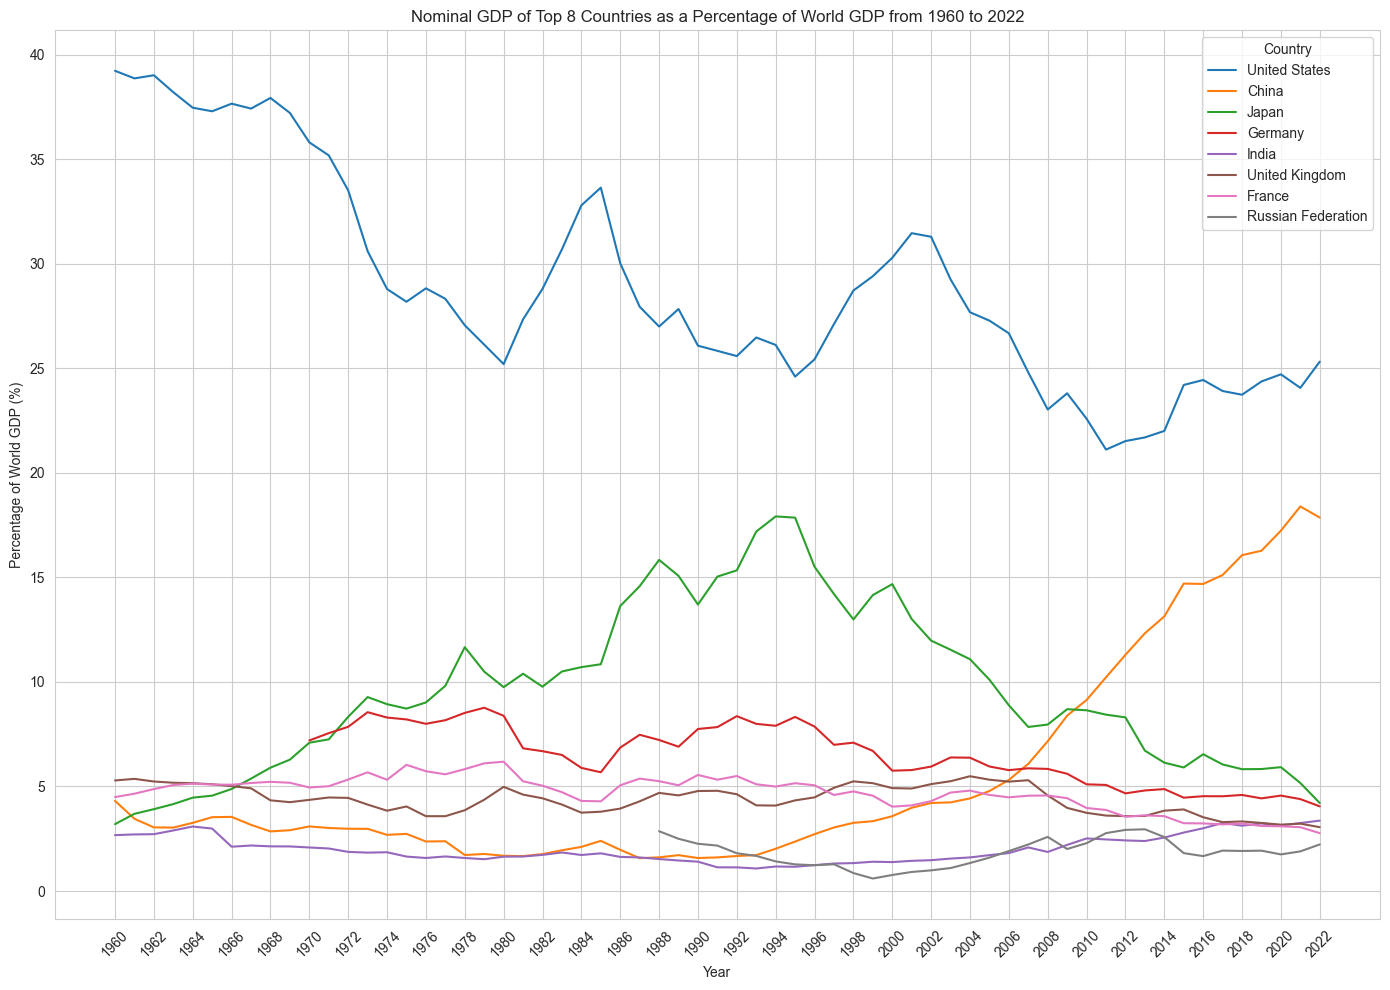

In [18]:
n=8

world_gdp = df.loc['World', '1960':'2022']

top_n_countries = df_countries_only.sort_values('2022', ascending=False).head(n)

top_n_countries_percentage = top_n_countries.div(world_gdp, axis=1) * 100

# Transpose the dataframe for plotting
top_n_countries_percentage_transpose = top_n_countries_percentage.loc[:, '1960':'2022'].T

plt.figure(figsize=(14, 10))

# Use Seaborn style
sns.set_style("whitegrid")

# Plot data
sns.lineplot(data=top_n_countries_percentage_transpose, dashes=False)

# Set labels and title
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.xticks(ticks=[i for i in range(0, len(top_n_countries_percentage_transpose.index), 2)], 
           labels=[top_n_countries_percentage_transpose.index[i] for i in range(0, len(top_n_countries_percentage_transpose.index), 2)])
plt.ylabel('Percentage of World GDP (%)')
plt.title('Nominal GDP of Top 8 Countries as a Percentage of World GDP from 1960 to 2022')

plt.legend(title='Country', loc='upper right')

plt.tight_layout()

plt.savefig('GDPtop8-percentage.jpg')
plt.show()



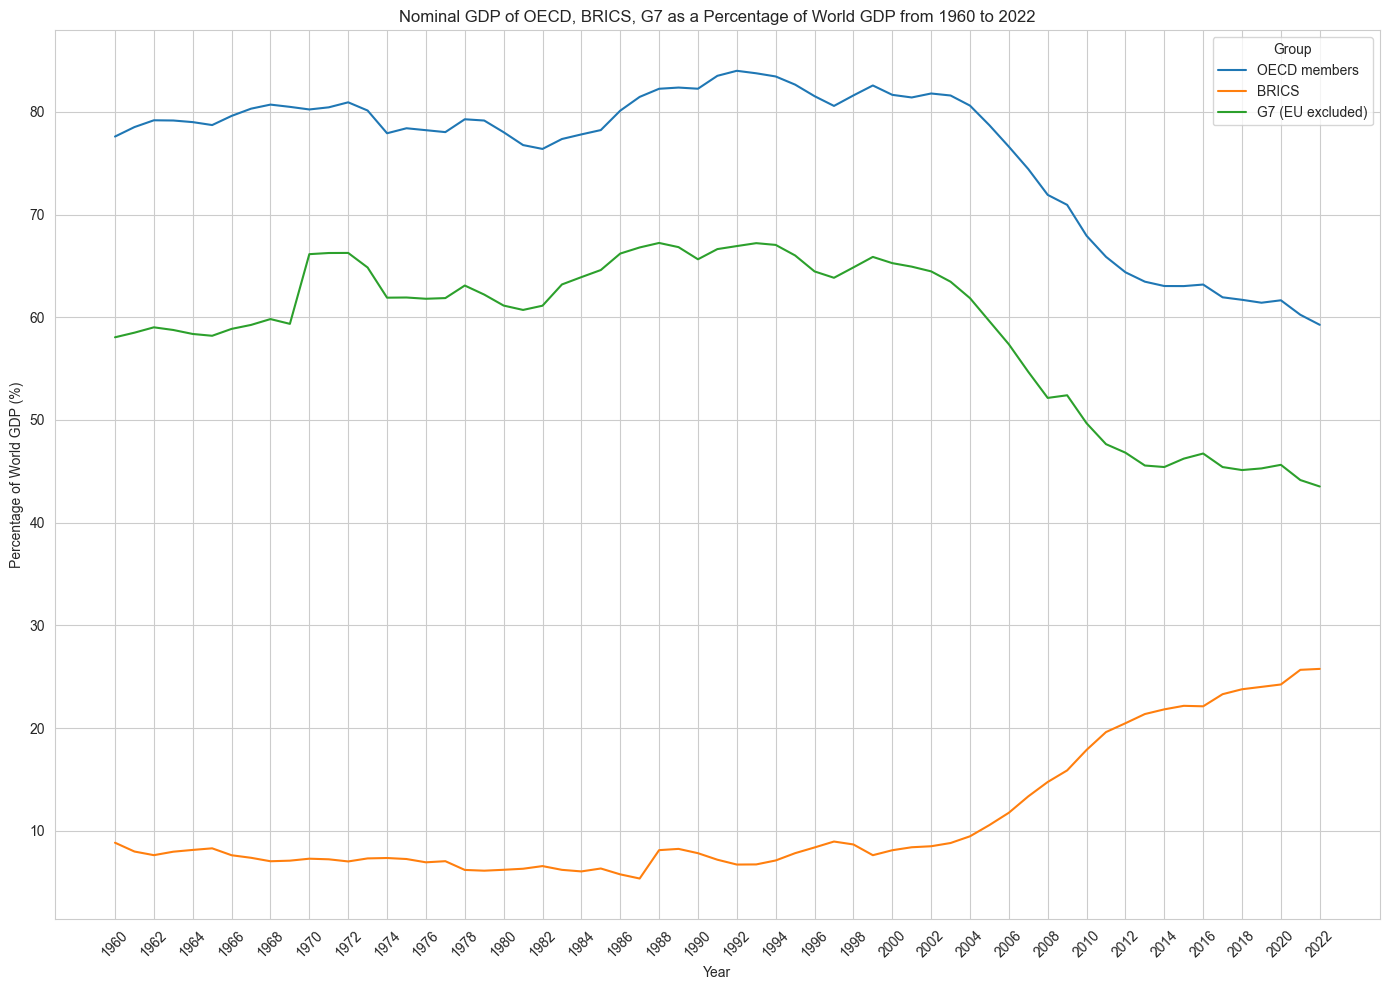

In [19]:
brics_countries = ['Brazil', 'Russian Federation', 'India', 'China', 'South Africa']
df.loc['BRICS'] = df.loc[brics_countries].sum()
g7_countries = ['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom', 'United States']
df.loc['G7 (EU excluded)'] = df.loc[g7_countries].sum()

groups = ['OECD members', 'BRICS', 'G7 (EU excluded)']
world_gdp = df.loc['World', '1960':'2022']
group_percentages = df.loc[groups].div(world_gdp, axis=1) * 100

group_percentages_transpose = group_percentages.loc[:, '1960':'2022'].T

plt.figure(figsize=(14, 10))

# Use Seaborn style
sns.set_style("whitegrid")

# Plot data
sns.lineplot(data=group_percentages_transpose, dashes=False)

# Set labels and title
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.xticks(ticks=[i for i in range(0, len(group_percentages_transpose.index), 2)], 
           labels=[group_percentages_transpose.index[i] for i in range(0, len(group_percentages_transpose.index), 2)])
plt.ylabel('Percentage of World GDP (%)')
plt.title('Nominal GDP of OECD, BRICS, G7 as a Percentage of World GDP from 1960 to 2022')

plt.legend(title='Group', loc='upper right')

plt.tight_layout()

plt.savefig('GDP-BRICS-OECD-G7-percentage.jpg')
plt.show()


In [8]:
df_countries_percentage = df_countries_only.copy()
df_countries_percentage.loc[:, '1960':'2022'] = df_countries_percentage.loc[:, '1960':'2022'].pct_change(axis=1) * 100
correlation_matrix = df_countries_percentage.loc[:, '1960':'2022'].T.corr()

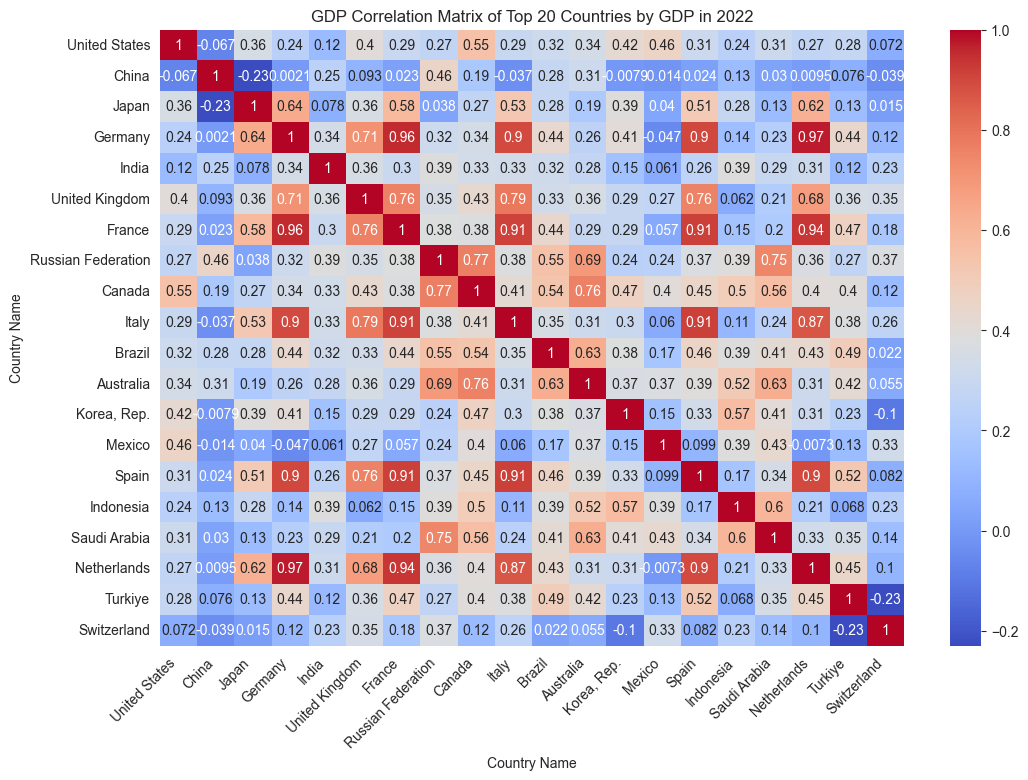

In [20]:
n=20
top_n_countries = df_countries_only.sort_values('2022', ascending=False).head(n).index

# Get the subset of the correlation matrix for these countries
subset_corr_matrix = correlation_matrix.loc[top_n_countries, top_n_countries]

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(subset_corr_matrix, annot=True, cmap='coolwarm')
plt.title(f'GDP Correlation Matrix of Top {n} Countries by GDP in 2022')
plt.xticks(rotation=45, ha="right")

plt.savefig('Correlation20.jpg')
plt.show()


In [10]:
n=80
top_n_df_countries_percentage = df_countries_only.sort_values('2022', ascending=False).head(n)
top_n_df_countries_percentage.loc[:, '1960':'2022'] = top_n_df_countries_percentage.loc[:, '1960':'2022'].pct_change(axis=1) * 100
correlation_matrix = top_n_df_countries_percentage.loc[:, '1960':'2022'].T.corr()


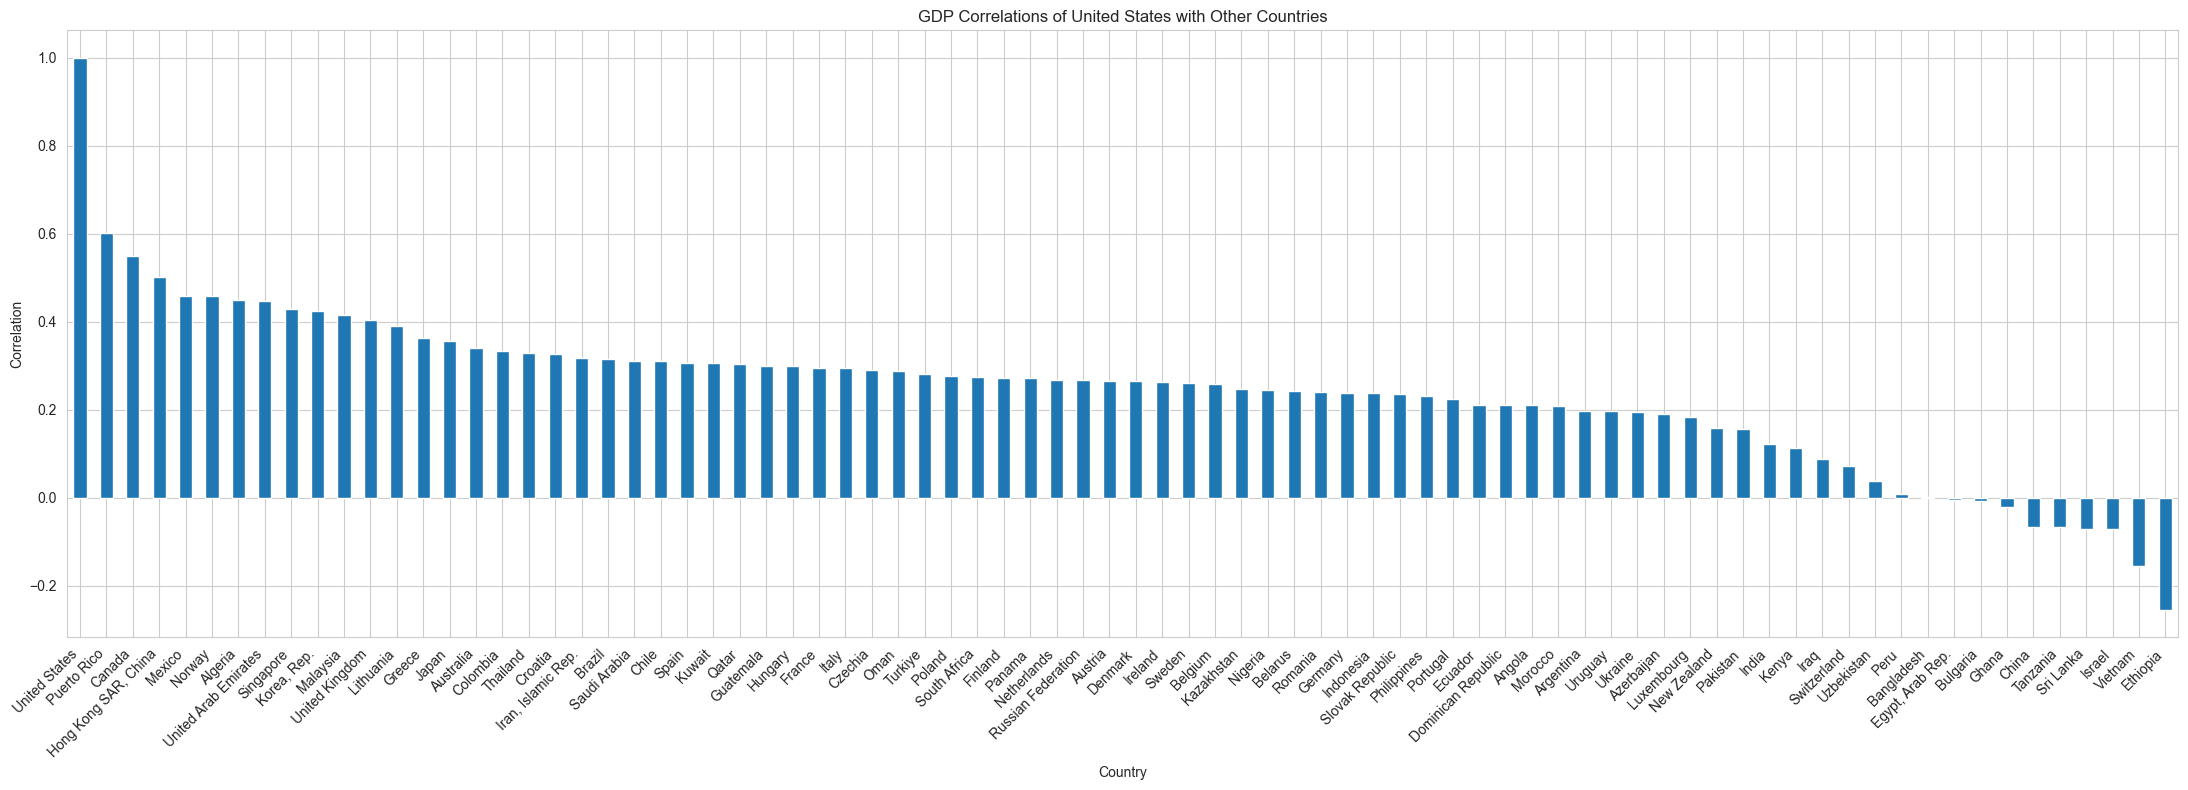

In [26]:
# Get the correlations of United States with other countries
us_correlation = correlation_matrix['United States']

# Sort the correlations
sorted_us_correlation = us_correlation.sort_values(ascending=False)

# Plot
plt.figure(figsize=(22, 8))
sorted_us_correlation.plot(kind='bar')
plt.title('GDP Correlations of United States with Other Countries')
plt.xlabel('Country')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.savefig('CorrelationUSA.jpg')
plt.show()


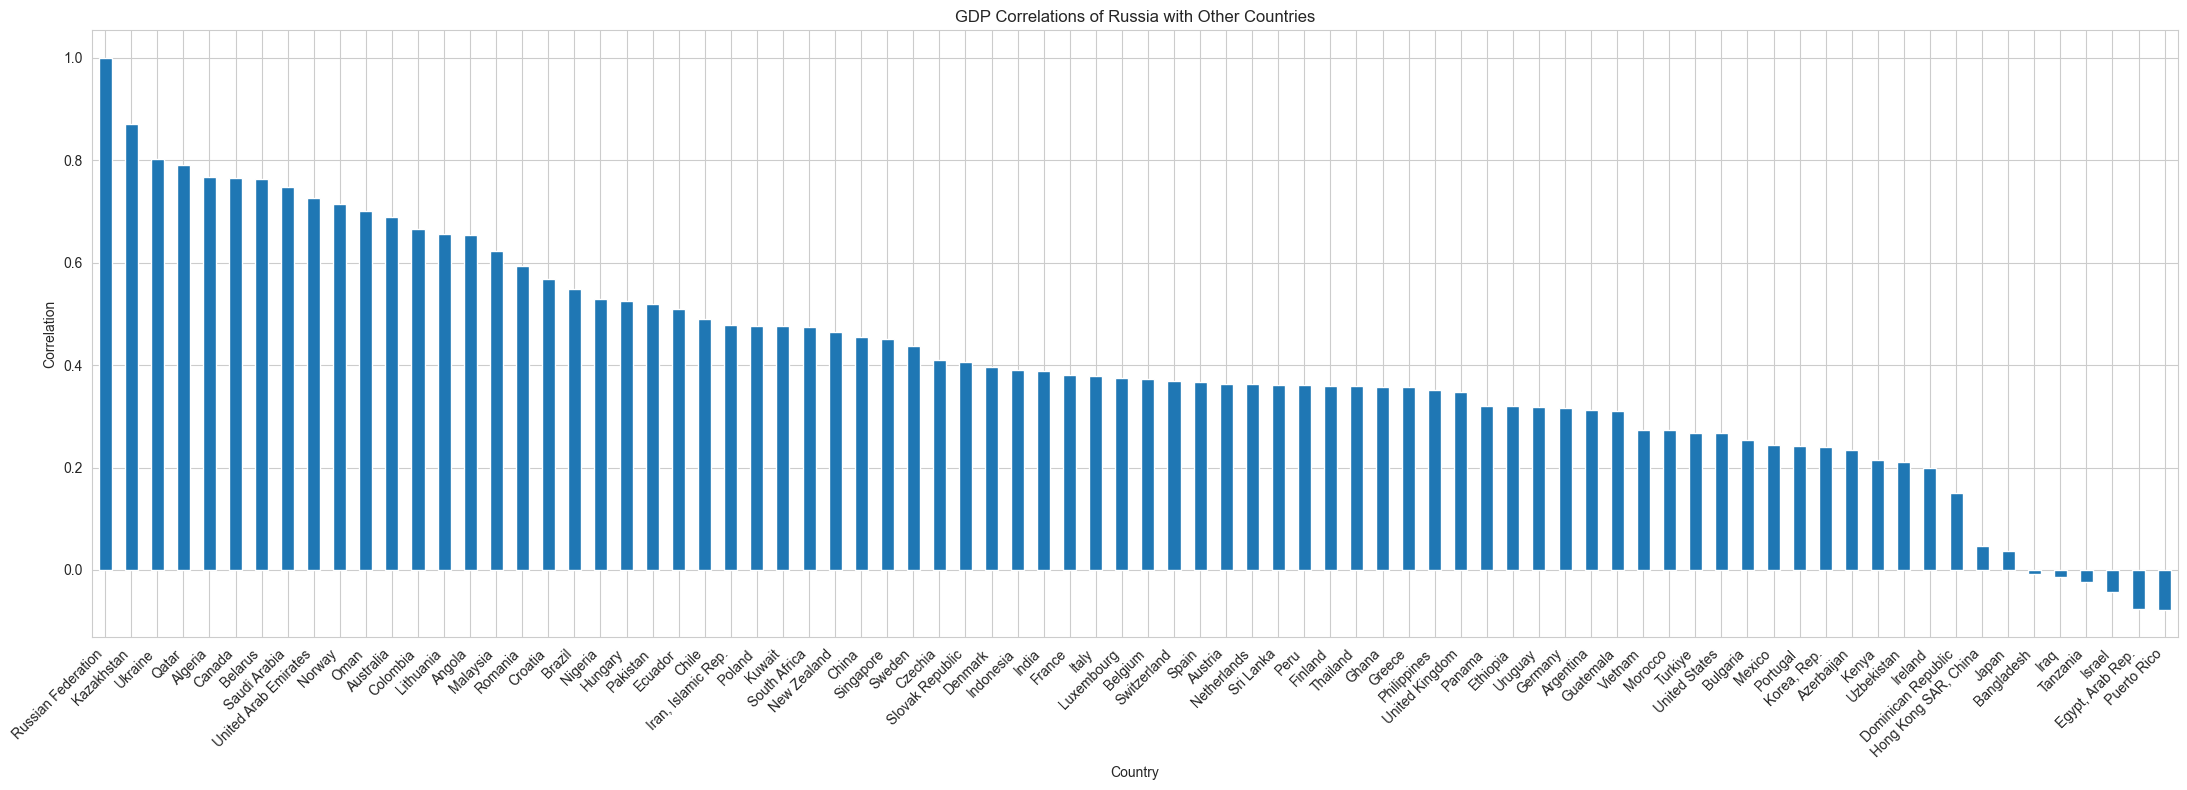

In [27]:
# Get the correlations of United States with other countries
us_correlation = correlation_matrix['Russian Federation']

# Sort the correlations
sorted_us_correlation = us_correlation.sort_values(ascending=False)

# Plot
plt.figure(figsize=(22, 8))
sorted_us_correlation.plot(kind='bar')
plt.title('GDP Correlations of Russia with Other Countries')
plt.xlabel('Country')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.savefig('CorrelationRussia.jpg')
plt.show()



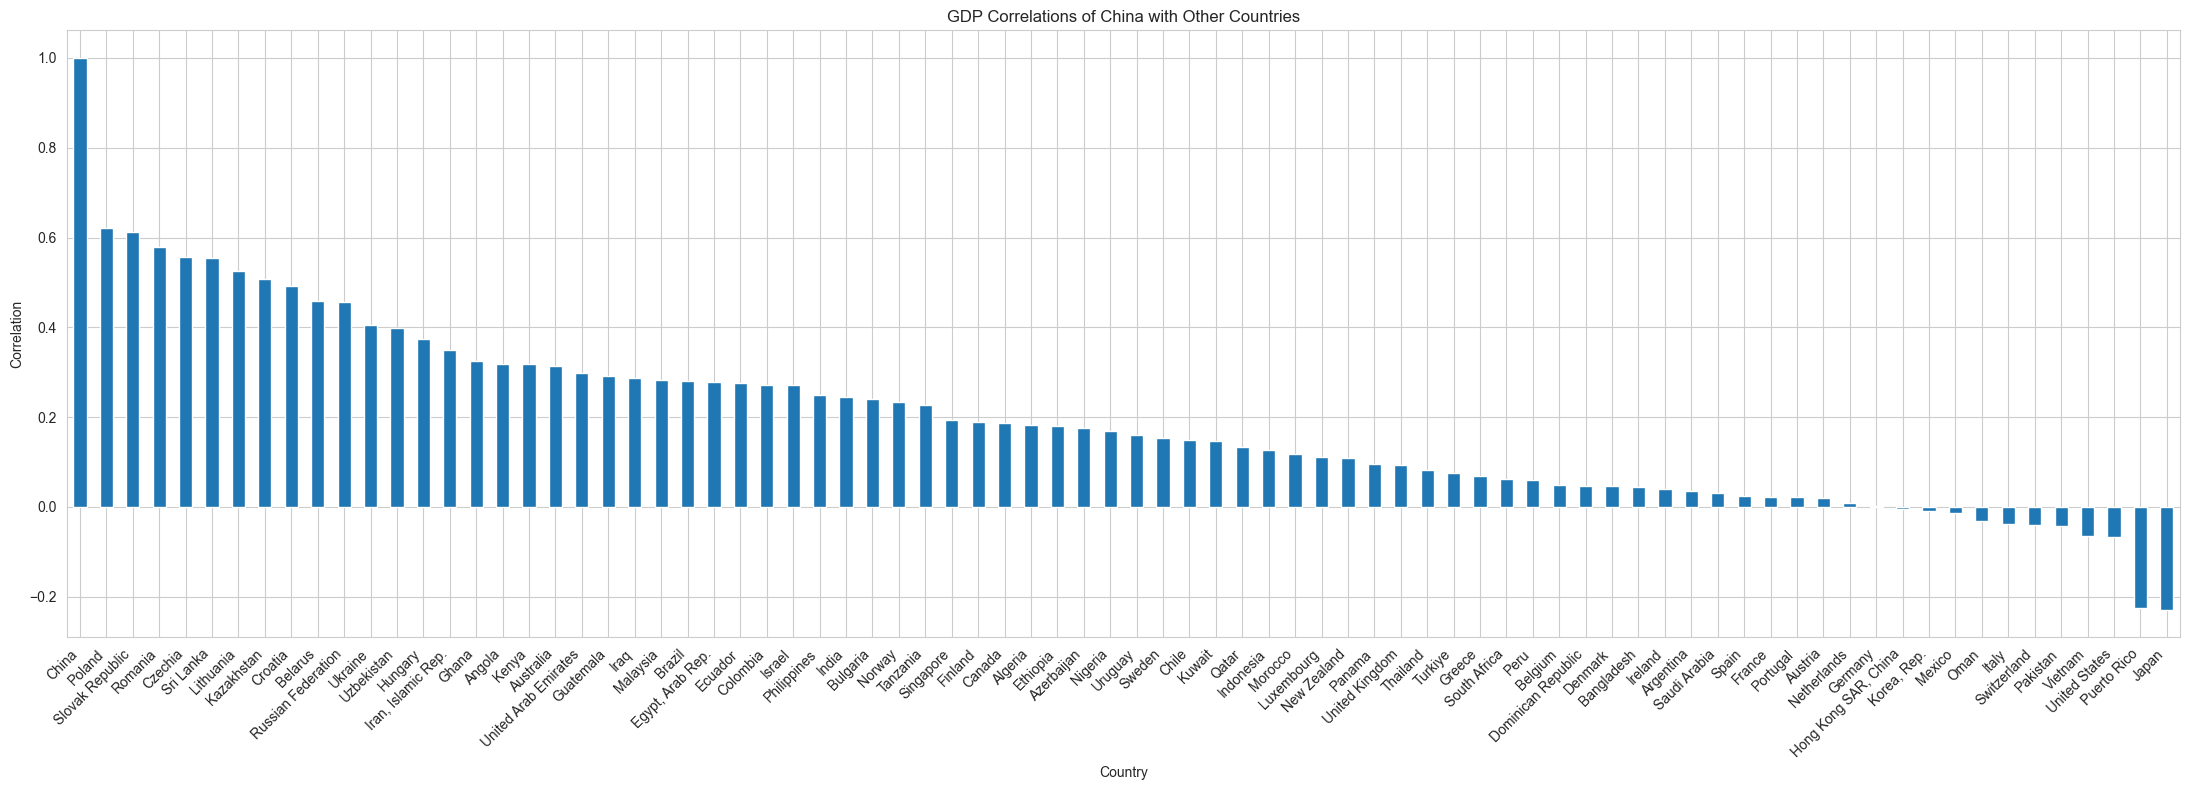

In [28]:
# Get the correlations of United States with other countries
us_correlation = correlation_matrix['China']

# Sort the correlations
sorted_us_correlation = us_correlation.sort_values(ascending=False)

# Plot
plt.figure(figsize=(22, 8))
sorted_us_correlation.plot(kind='bar')
plt.title('GDP Correlations of China with Other Countries')
plt.xlabel('Country')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.savefig('CorrelationChina.jpg')
plt.show()



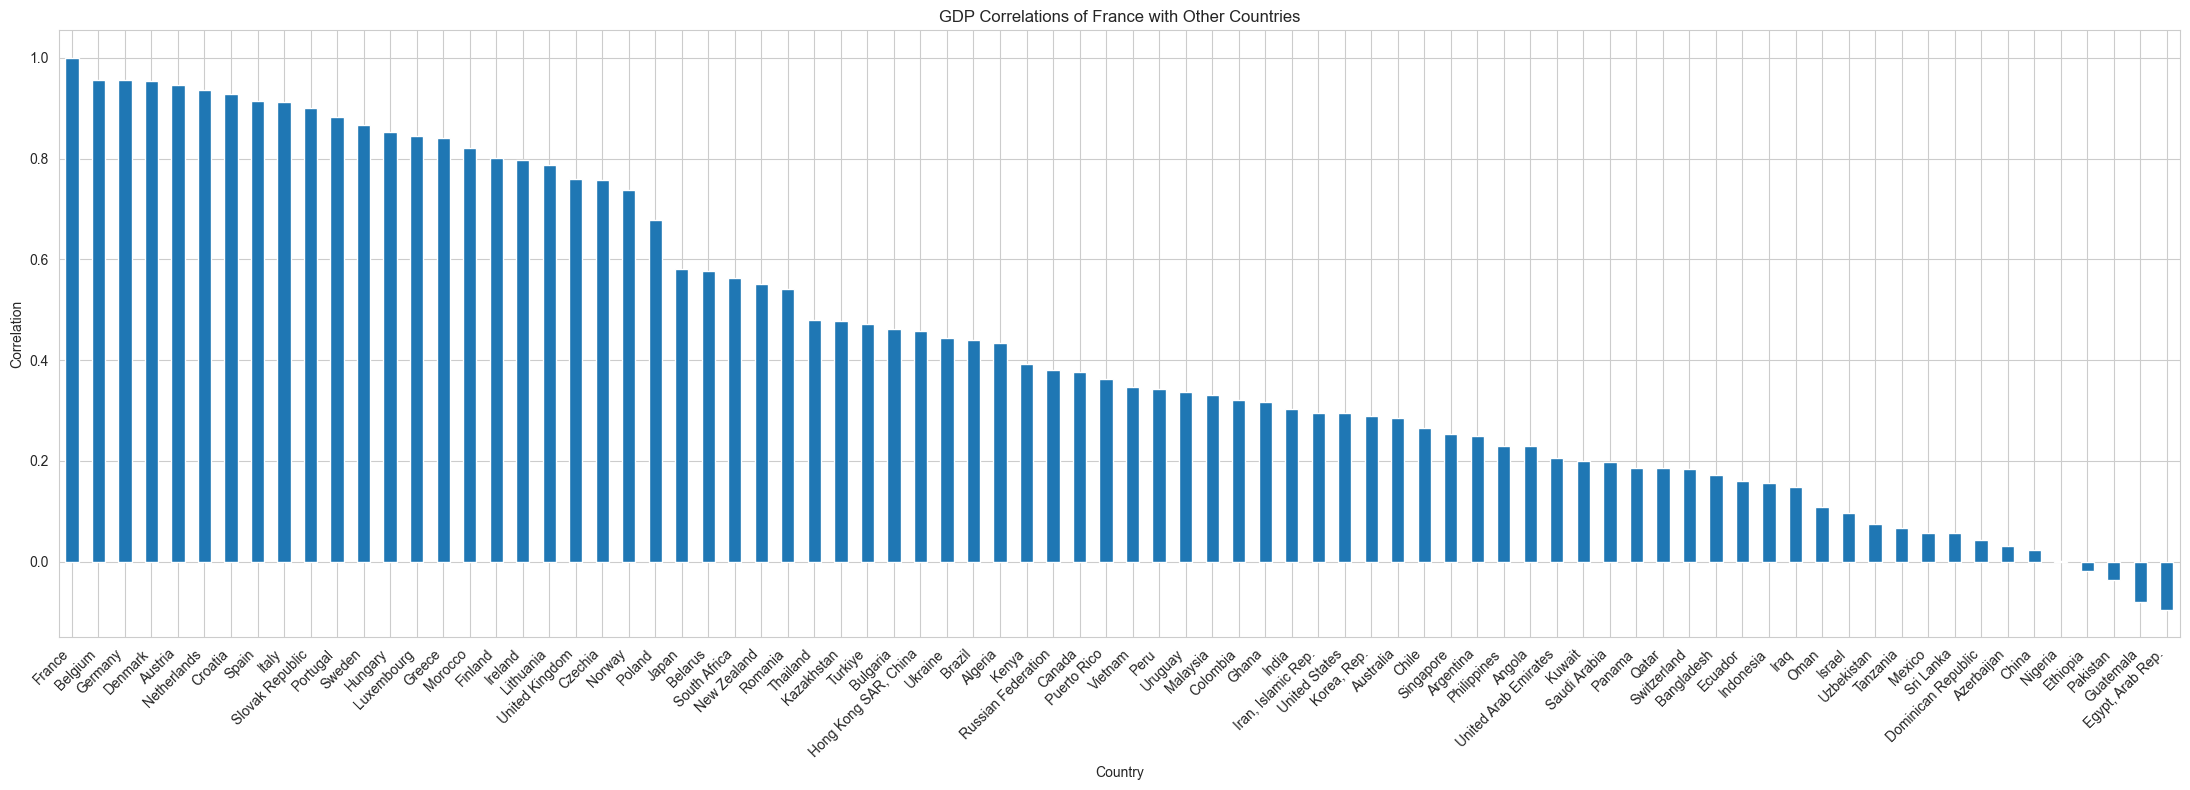

In [29]:
# Get the correlations of United States with other countries
us_correlation = correlation_matrix['France']

# Sort the correlations
sorted_us_correlation = us_correlation.sort_values(ascending=False)

# Plot
plt.figure(figsize=(22, 8))
sorted_us_correlation.plot(kind='bar')
plt.title('GDP Correlations of France with Other Countries')
plt.xlabel('Country')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.savefig('CorrelationFrance.jpg')
plt.show()


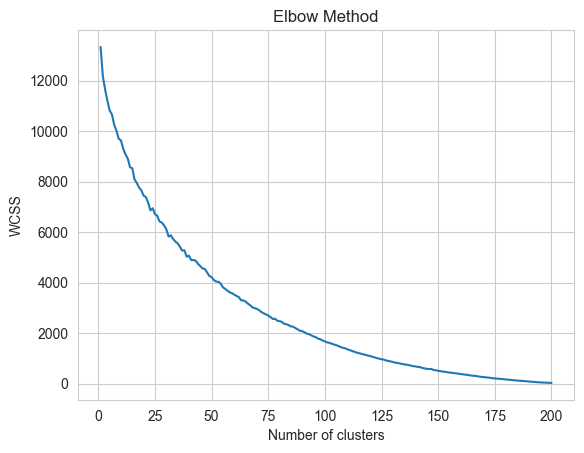

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Preprocess data
df_countries_percentage_k = df_countries_percentage.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1)
df_countries_percentage_k = df_countries_percentage_k.fillna(0)
data = StandardScaler().fit_transform(df_countries_percentage_k.iloc[:, 1:])

# Determine optimal number of clusters
wcss = []
max_clusters = 200  # Modify this to set your maximum number of clusters
for i in range(1, max_clusters + 1):  # Change range to go up to 100
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, max_clusters + 1), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.savefig('Elbow.jpg')
plt.show()

No clear elbow point